In [1]:
import pandas as pd
df= pd.read_csv('hw1.csv')
df.head()

,x1,x2,y
0,7,48,0
1,52,85,1
2,10,55,0
3,43,25,0
4,33,8,0


In [2]:
import matplotlib.pyplot as plt
import random
import math
from IPython import display
from scipy.signal import savgol_filter


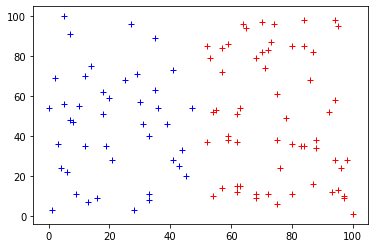

In [3]:
x1= df["x1"].values.tolist()
x2= df["x2"].values.tolist()
y= df["y"].values.tolist()
for i in range(len(y)):
    if y[i]==0:
        plt.plot (x1[i],x2[i],"b+")
    else:
        
        plt.plot (x1[i],x2[i],"r+")

In [4]:
w=[random.random(),random.random()]
b=random.random()
lr=5
theta=0.05

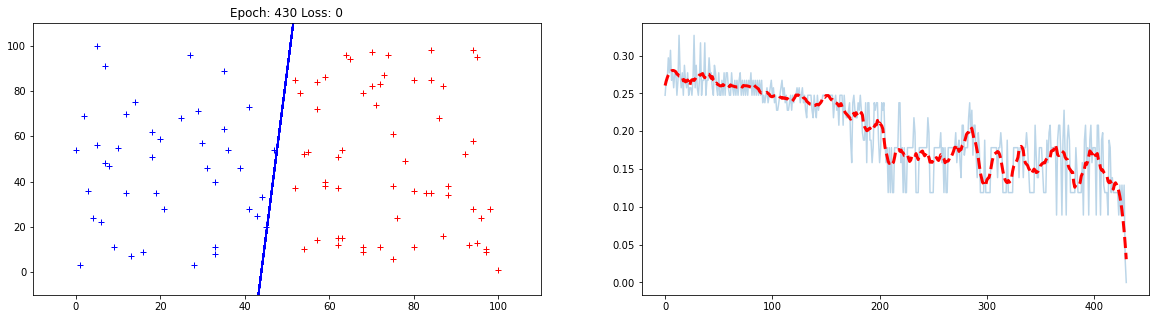

Epoch: 430 Loss: 0.0


In [6]:
from IPython import display
from scipy.signal import savgol_filter
epoch = 0
count = 0
 

loss = []
 
while count < len(x1):

    total_error = 0
    for i in range(len(x1)):
        weighted_sum = w[0]*x1[i] + w[1]*x2[i] + b
        pred = 0
        if weighted_sum > theta:
            pred = 1
 
        error =  y[i] - pred
        if error != 0:
            count = 0
            total_error += math.sqrt(error**2)

            w[0] += lr * error * x1[i]
            w[1] += lr * error * x2[i]
            b    += lr * error
        else:
            count += 1

    loss.append(1/len(x1)*total_error)

    plt.figure(figsize=(20,5))
    #loss.append([epoch, total_error])   
    display.clear_output(wait=True)
    plt.subplot(1,2,1)
 
    for i in range(len(y)):
        if y[i] == 0:
            plt.plot(x1[i], x2[i], "b+")
        else:
            plt.plot(x1[i], x2[i], "r+")
 
        plt.xlim([-10, 110])
        plt.ylim([-10, 110])
 
        xintr=(theta-b)/w[0]
        yintr=(theta-b)/w[1]
        slope = -yintr/xintr
        xx = plt.xlim()
#       print(xx)
        yeq = []
        for x in xx:
            yeq.append(slope*x+yintr)
        plt.plot(xx,yeq, 'b-')
 
    plt.title(f"Epoch: {epoch} Loss: {total_error}")
 
    plt.subplot(1,2,2)
    plt.plot(loss, alpha=0.3)
    if epoch > 20:
        yhat = savgol_filter(loss, 21, 3) # window size 51, polynomial order 3
        plt.plot(yhat, 'r--', lw=3)
 
    plt.show()

    print(f"Epoch: {epoch} Loss: {loss[-1]}")
    epoch += 1
